In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import sklearn.tree as tree
import pydotplus
from sklearn.externals.six import StringIO 
from IPython.display import Image

ModuleNotFoundError: No module named 'pydotplus'

In [3]:
data=pd.read_csv("data.csv")
data

FileNotFoundError: [Errno 2] File data.csv does not exist: 'data.csv'

In [3]:
col_names = ['song_number', 'acousticness', 'danceability','duration_ms', 'energy','instrumentalnes','key', 'liveness','loudness','mode','speechiness','tempo', 'time_signature','valence','target','song_title','artist']

In [4]:
data.columns

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [5]:
data.columns = col_names

In [6]:
data.columns

Index(['song_number', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalnes', 'key', 'liveness', 'loudness', 'mode', 'speechiness',
       'tempo', 'time_signature', 'valence', 'target', 'song_title', 'artist'],
      dtype='object')

In [7]:
data.danceability.median()

0.631

In [8]:
data.head()

,song_number,acousticness,danceability,duration_ms,energy,instrumentalnes,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [9]:
feature_cols = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalnes', 'key', 'liveness', 'loudness', 'mode', 'speechiness',
       'tempo', 'time_signature', 'valence']
X = data[feature_cols] # Features
y = data.target # Target variable

In [10]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 70% training and 30% test

In [1]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

NameError: name 'DecisionTreeClassifier' is not defined

In [12]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7178217821782178


In [13]:
confusion_matrix(y_test, y_pred)

array([[147,  58],
       [ 56, 143]], dtype=int64)

In [14]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(147, 58, 56, 143)

In [15]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

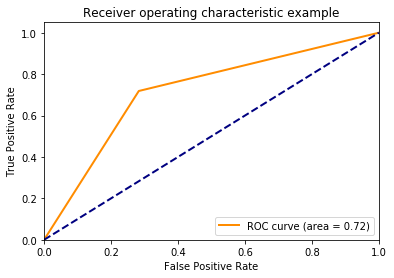

In [16]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [17]:
data.target.unique

<bound method Series.unique of 0       1
1       1
2       1
3       1
4       1
       ..
2012    0
2013    0
2014    0
2015    0
2016    0
Name: target, Length: 2017, dtype: int64>

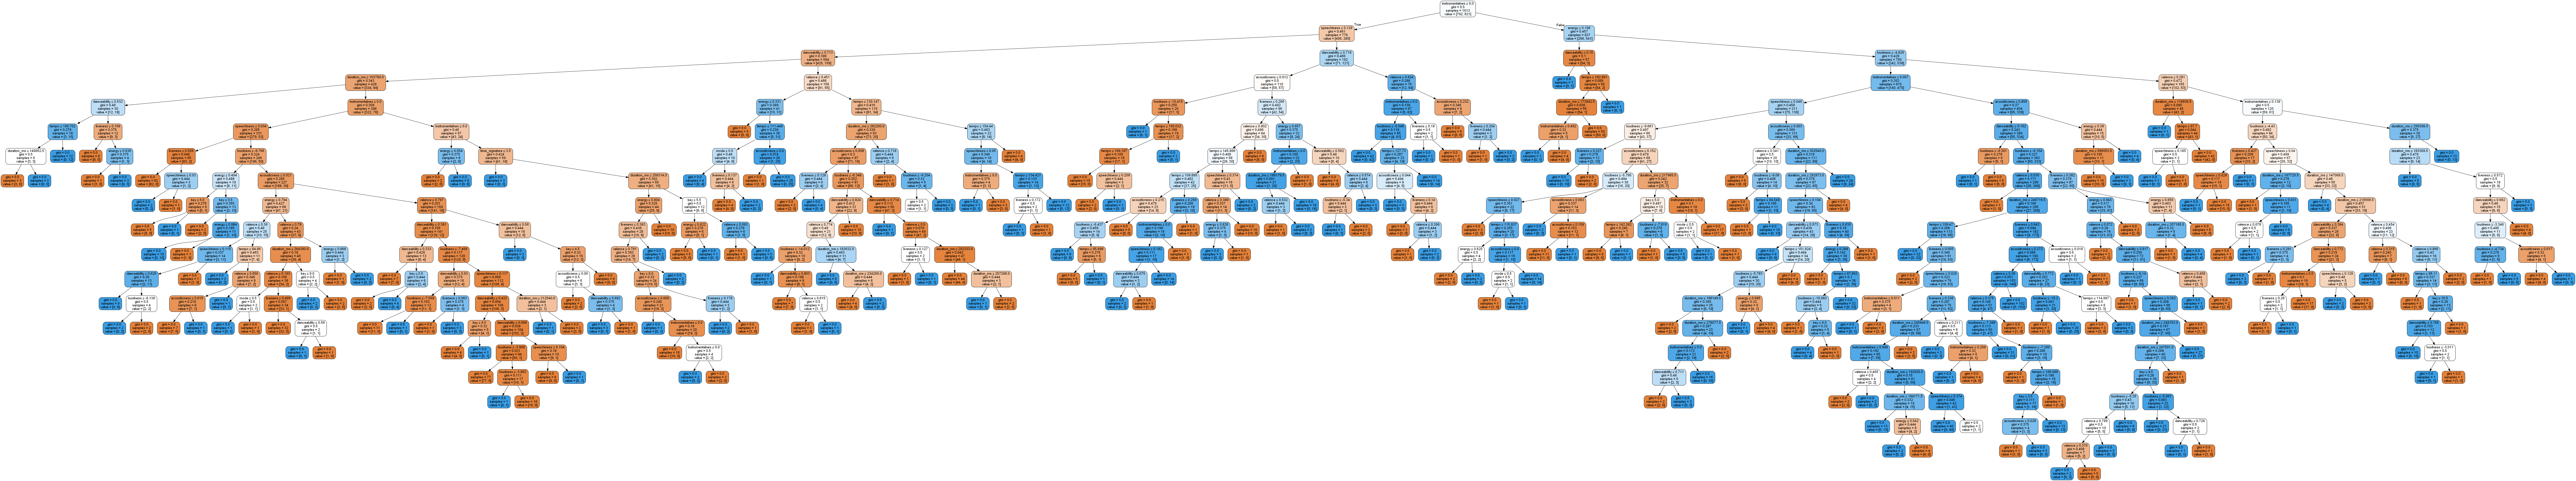

In [18]:
dot_data = StringIO()
tree.export_graphviz(clf,
                     out_file=dot_data, 
                     feature_names=X.columns, # the feature names.
                     filled=True, # Whether to fill in the boxes with colours.
                     rounded=True, # Whether to round the corners of the boxes.
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())